## Monte Carlo Simulation

A very common tool in physics is a so called **Monte Carlo Simulation (MCS)**. We want to carry out a MCS in order to estimate the number $\pi$ (even though this is not the most efficient way to do so).

The idea is to generate uniformly distributed random numbers from 0 to 1 for two coordinates $x$ and $y$. We then select those numbers $N$ which satisfy the condition $x^2 + y^2 < 1$ and compare $N$ to the total number $N_{tot}$ of generated random numbers.<br>
For large $N_{tot}$<br> 
<br>
$N \propto \pi/4\,\, r^2$ and<br> 
$N_{tot} \propto \, r^2$<br>
<br>
where $r = 1$ since we only pick random numbers from 0 to 1.

In [143]:
import numpy as np
import matplotlib.pyplot as plt

def CalcPi(N):
    X = np.random.uniform(0,1,(N,1))
    Y = np.random.uniform(0,1,(N,1))
    R = X**2 + Y**2
    PI = 4*(R< 1).sum()/N
    
    print(f"Pi = {PI: 0.6f}")

    xplot = np.arange(0,1,1/1000)
    yplot = np.sqrt(1 - xplot**2)
    
    plt.plot(xplot, yplot, 'r--')
    plt.fill_between(xplot, yplot, facecolor = 'k', alpha = 0.12)
    plt.scatter(X,Y, s = 1, c = 'k')
    plt.show()

Let us run *CalcPi* for different $N$ and see how close it gets to the actual value of $\pi$:

Pi =  3.080000


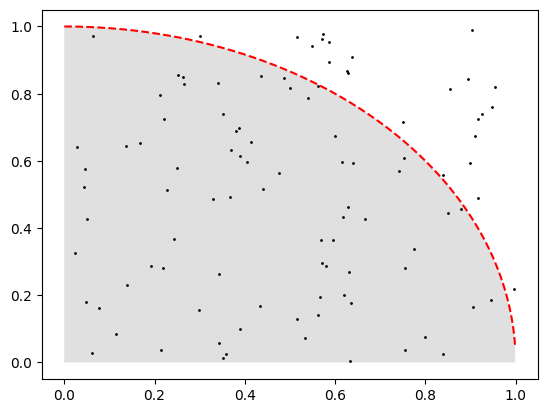

In [147]:
CalcPi(100)

Now, we want to modify *CalcPi* so that we can run it many times (>100) for different $N = 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000$. How does the average value of $\pi$ and its error change as a function of $N$?

In [150]:
def CalcPi2(N):
    Nreps = 1000
    PI    = np.zeros((Nreps)) 

    for i in range(Nreps):
    
        X     = np.random.uniform(0,1,(N,1))
        Y     = np.random.uniform(0,1,(N,1))
        R     = X**2 + Y**2
        PI[i] = 4*(R< 1).sum()/N

    return np.mean(PI), np.std(PI)
        
    #print(PI)
    
    #xplot = np.arange(0,1,1/1000)
    #yplot = np.sqrt(1 - xplot**2)
    
    #plt.plot(xplot, yplot, 'r--')
    #plt.fill_between(xplot, yplot, facecolor = 'k', alpha = 0.12)
    #plt.scatter(X,Y, s = 1, c = 'k')
    #plt.show()

In [47]:
CalcPi2(5)

(3.0896000000000003, 0.734501082368161)

Now for many different $N$:

In [52]:
N = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]

In [92]:
AllPi = np.array(list(map(CalcPi2,N)))

In [94]:
print(AllPi)

[[3.1428     0.51296019]
 [3.1452     0.36248719]
 [3.13896    0.23654623]
 [3.13968    0.16213543]
 [3.13732    0.11143077]
 [3.139488   0.06923301]
 [3.142464   0.05086618]
 [3.141452   0.03669708]
 [3.1420704  0.02302728]
 [3.1412236  0.01635997]
 [3.140546   0.01165658]]


<br>

Plotting $\pi$ vs $N$:

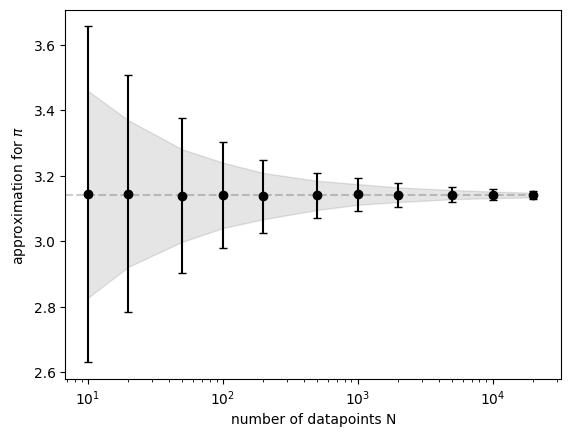

In [96]:
e_theo = 1/np.sqrt(np.array(N))

plt.fill_between(N, AllPi[:,0] + e_theo, AllPi[:,0] - e_theo, color = 'k', alpha = 0.1, interpolate = True,)
plt.plot([0, 1.1*N[-1]], [np.pi, np.pi], 'k--', alpha = 0.2)
plt.errorbar(N, AllPi[:,0], yerr=AllPi[:,1], capsize=3, fmt="ko", ecolor = "black")
plt.xscale('log')
plt.xlabel('number of datapoints N')
plt.ylabel('approximation for $\pi$')
plt.show()